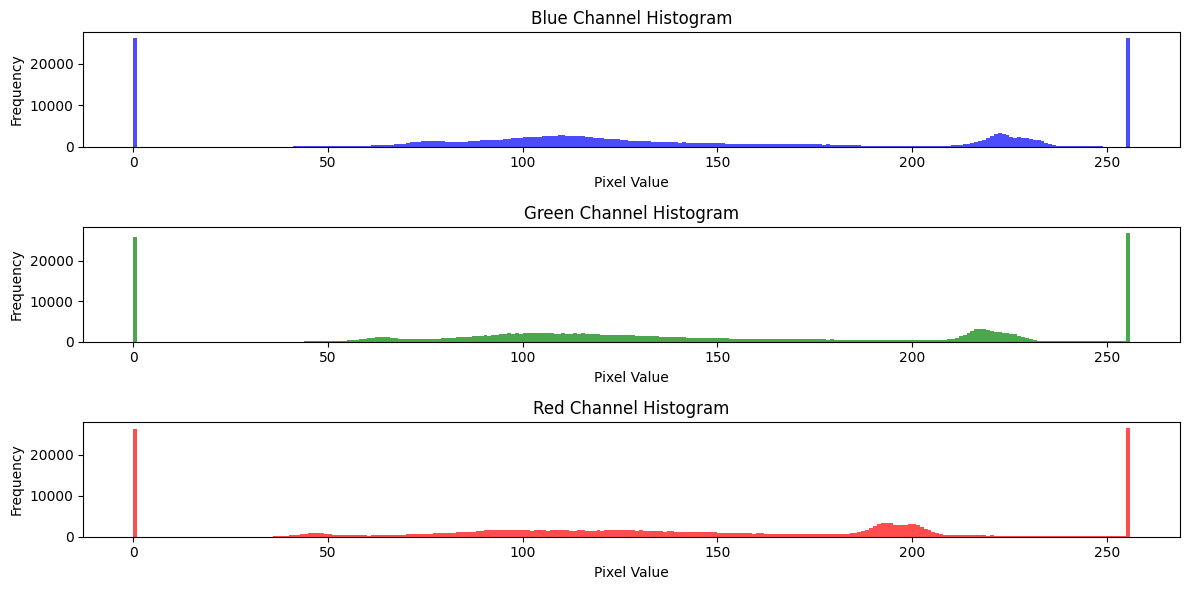

In [7]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/home/SCV/data/4.png")

blue_channel, green_channel, red_channel = cv2.split(image)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.hist(blue_channel.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Blue Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(3, 1, 2)
plt.hist(green_channel.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.title("Green Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
plt.hist(red_channel.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.title("Red Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [8]:
blue_channel, green_channel, red_channel = cv2.split(image)
black_pixels = ((blue_channel == 0) & (green_channel == 0) & (red_channel == 0)).sum()
white_pixels = ((blue_channel == 255) & (green_channel == 255) & (red_channel == 255)).sum()

print(f"Black Pixels: {black_pixels}")
print(f"White Pixels: {white_pixels}")


Black Pixels: 269
White Pixels: 332


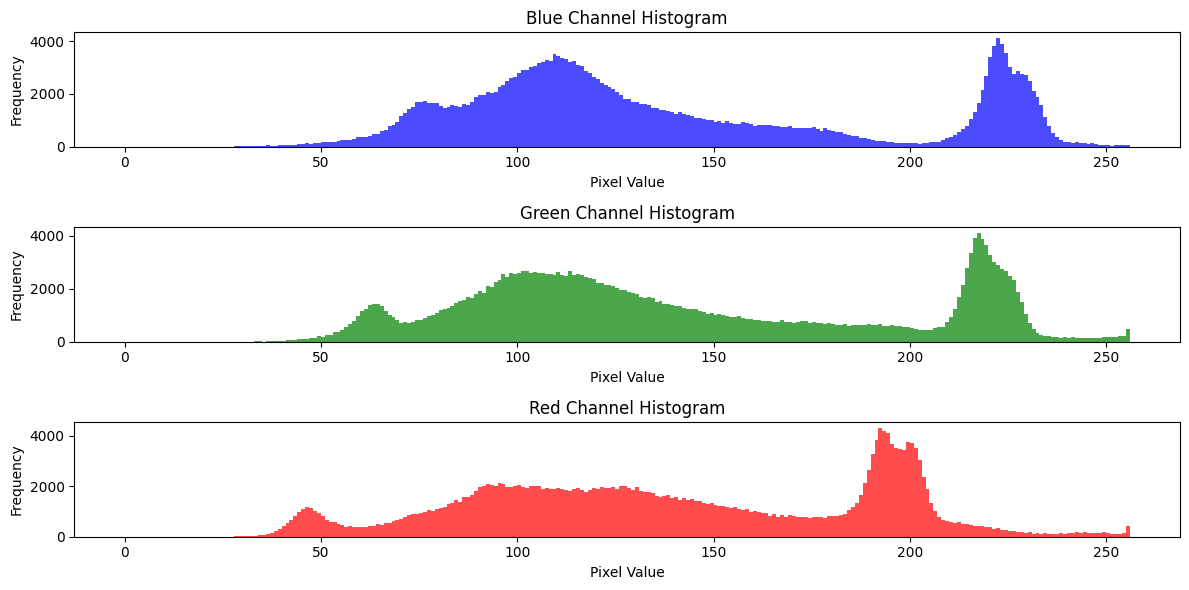

In [9]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/home/SCV/data/1.png")

blue_channel, green_channel, red_channel = cv2.split(image)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.hist(blue_channel.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Blue Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(3, 1, 2)
plt.hist(green_channel.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.title("Green Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
plt.hist(red_channel.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.title("Red Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


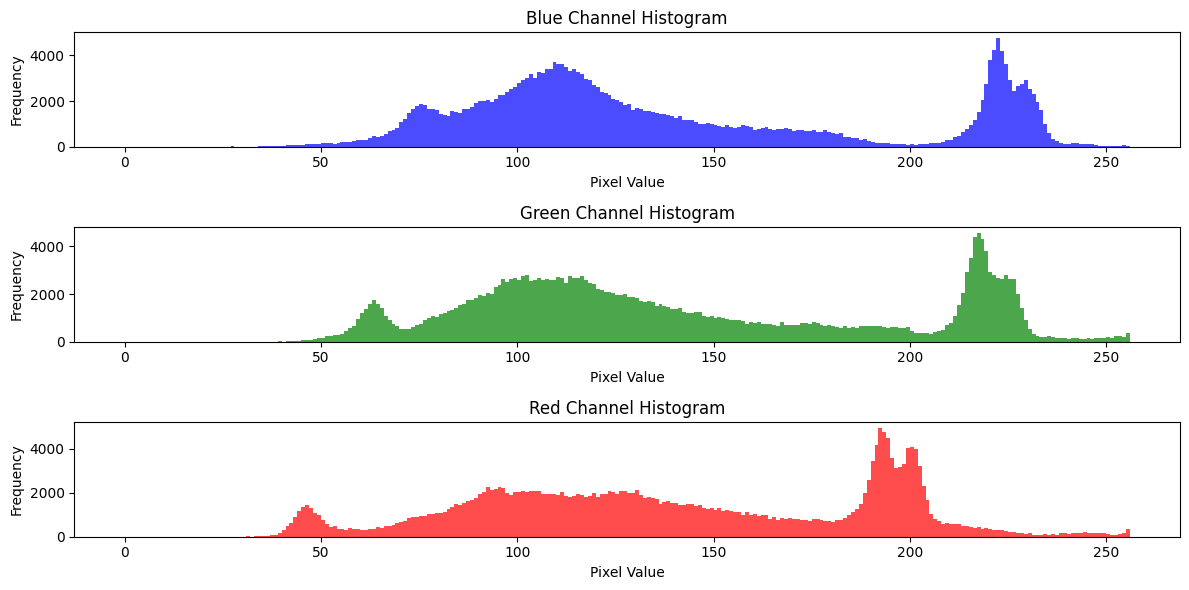

In [16]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("/home/SCV/data/1.png")

median_filtered = cv2.medianBlur(image, 3) 

# plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
# plt.title("After Median Filtering (Salt-and-Pepper Noise Reduction)")
# plt.axis('off')
# plt.show()


blue_channel, green_channel, red_channel = cv2.split(median_filtered)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.hist(blue_channel.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Blue Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(3, 1, 2)
plt.hist(green_channel.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.title("Green Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
plt.hist(red_channel.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.title("Red Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [17]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("/home/SCV/data/4.png")

median_filtered = cv2.medianBlur(image, 3) 

# plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
# plt.title("After Median Filtering (Salt-and-Pepper Noise Reduction)")
# plt.axis('off')
# plt.show()
cv2.imwrite("/home/SCV/data/4_processed.png", median_filtered)

True

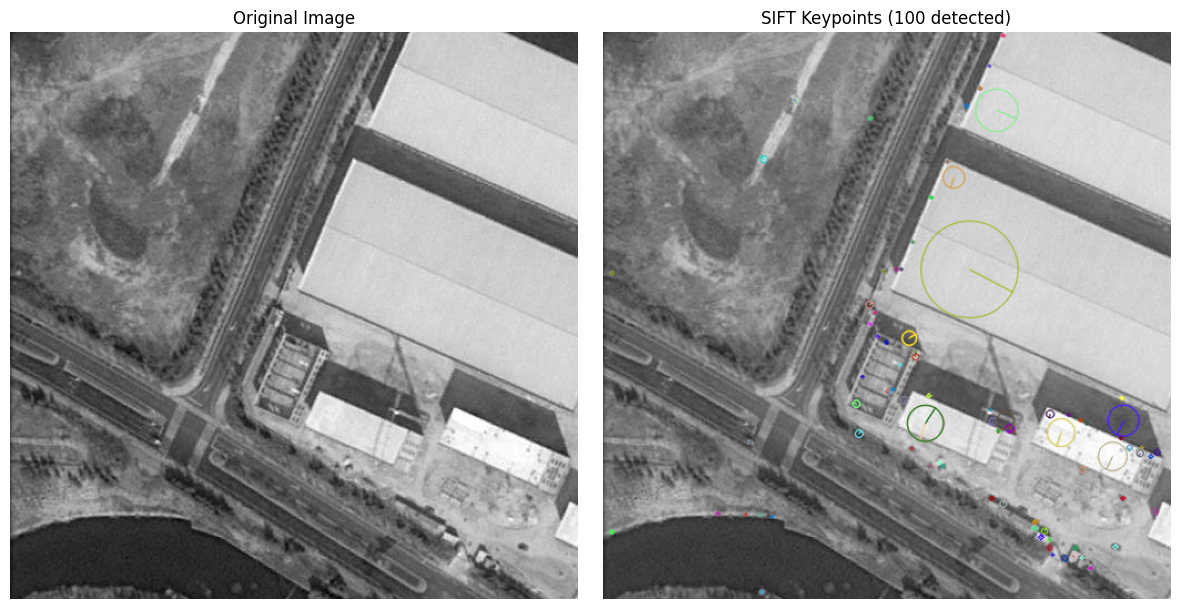

In [23]:
import cv2
import matplotlib.pyplot as plt

def extract_and_display_sift(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
   
    sift = cv2.SIFT_create()
   
    keypoints, descriptors = sift.detectAndCompute(image, None)
    sorted_indices = sorted(range(len(keypoints)), key=lambda i: keypoints[i].response, reverse=True)
    
    # Select the top keypoints and descriptors
    top_indices = sorted_indices[:100]
    keypoints = [keypoints[i] for i in top_indices]
    descriptors = descriptors[top_indices]

   
    output_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(output_image, cmap='gray')
    plt.title(f"SIFT Keypoints ({len(keypoints)} detected)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

    return keypoints, descriptors

image_path = "/home/SCV/data/1.png"  
keypoints, descriptors = extract_and_display_sift(image_path)




12


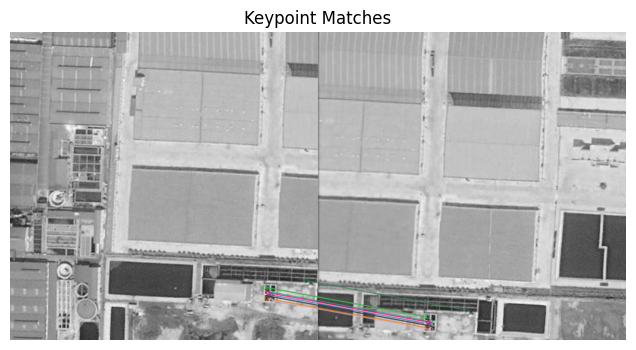

In [63]:
import cv2
import matplotlib.pyplot as plt

def match_and_display_sift_features(image_path1, image_path2, max_keypoints=100):
   
   
    image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    sift = cv2.SIFT_create()

    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    def filter_top_keypoints(keypoints, descriptors, max_keypoints):
        sorted_indices = sorted(range(len(keypoints)), key=lambda i: keypoints[i].response, reverse=True)
        top_indices = sorted_indices[:max_keypoints]
        return [keypoints[i] for i in top_indices], descriptors[top_indices]

    keypoints1, descriptors1 = filter_top_keypoints(keypoints1, descriptors1, max_keypoints)
    keypoints2, descriptors2 = filter_top_keypoints(keypoints2, descriptors2, max_keypoints)

    bf = cv2.BFMatcher(cv2.NORM_L2)  
  #  matches = bf.match(descriptors1, descriptors2)
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)
    
    good_matches = []
    for m, n in matches:
        if m.distance <  0.8* n.distance  and m.distance < 100: 
            good_matches.append(m)

   
    matches = sorted(good_matches, key=lambda x: x.distance)

    print(len([x.distance for x in matches]))
    matched_image = cv2.drawMatches(
        image1, keypoints1, image2, keypoints2, matches[0:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    plt.figure(figsize=(8, 4))
    plt.imshow(matched_image)
    plt.title("Keypoint Matches")
    plt.axis('off')
    plt.show()

    return matches

image1 = "/home/SCV/data/2.png"  
image2 = "/home/SCV/data/3.png" 

matches = match_and_display_sift_features(image1, image2, max_keypoints=100)
